# Ativaidade 01
- Definição de uma base de dados
- Analise os dados
- Trate os dados
- Escolha 2 modelos em função dos itens anteriores
- Defina as métricas de avaliação
- Compare os modelos

> Aluno: Marlos Ribeiro [mgrb]

## Prepanado o ambiente

### Instalando as bibliotecas necessárias

In [1]:
!uv add matplotlib
!uv add seaborn

Resolved 69 packages in 0.48ms
Audited 63 packages in 0.02ms
Resolved 69 packages in 0.45ms
Audited 63 packages in 0.02ms


### Download e verificação do dataset

In [2]:
# Importando Dados
import os
import pandas as pd

data_dir = os.getcwd()
data_url = "https://www.kaggle.com/api/v1/datasets/download/poojag718/rainfall-timeseries-data"
data_pkg = "data.zip"
# Comando curl com destino dinâmico
!curl -L --output "{data_dir}"/"{data_pkg}" "{data_url}"
# Descompactando o arquivo
!unzip -o "{data_dir}"/"{data_pkg}" -d "{data_dir}"/data
# deletando o arquivo zip
!rm -rf "{data_dir}"/"{data_pkg}"

data_path = os.path.join(data_dir, "data","Rainfall_data.csv")
data = pd.read_csv(data_path)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3395  100  3395    0     0   4203      0 --:--:-- --:--:-- --:--:--     0
Archive:  /home/mgrb/Workspaces/CESAR.School/series_temporais/notebooks/atividades/data.zip
  inflating: /home/mgrb/Workspaces/CESAR.School/series_temporais/notebooks/atividades/data/Rainfall_data.csv  


In [3]:
data.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [4]:
# Join Year Month Day to Date and drop the columns
data['date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# renomeando a coluna 
# Specific Humidity -> Humidity_specific
# Relative Humidity -> Humidity_relative
col_names_map = {
    'Specific Humidity': 'humidity_specific',
    'Relative Humidity': 'humidity_relative',
    'Precipitation': 'precipitation',
    'Temperature': 'temperature',
}
data.rename(columns=col_names_map, inplace=True)

# ordenando as colunas
data = data[['date', 'temperature', 'humidity_specific', 'humidity_relative', 'precipitation']]

# ordenar dataset por data
data.sort_values('date', inplace=True)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               252 non-null    datetime64[ns]
 1   temperature        252 non-null    float64       
 2   humidity_specific  252 non-null    float64       
 3   humidity_relative  252 non-null    float64       
 4   precipitation      252 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 10.0 KB


## Ajustando metricas de Timeseries

In [6]:
# Calculando a média móvel
data["humidity_specific_mean_expanding"] = data["humidity_specific"].expanding().mean()
data["humidity_relative_mean_expanding"] = data["humidity_relative"].expanding().mean()
data["precipitation_mean_expanding"] = data["precipitation"].expanding().mean()
data["temperature_mean_expanding"] = data["temperature"].expanding().mean()

### Plotando dados com suas respecticas médias

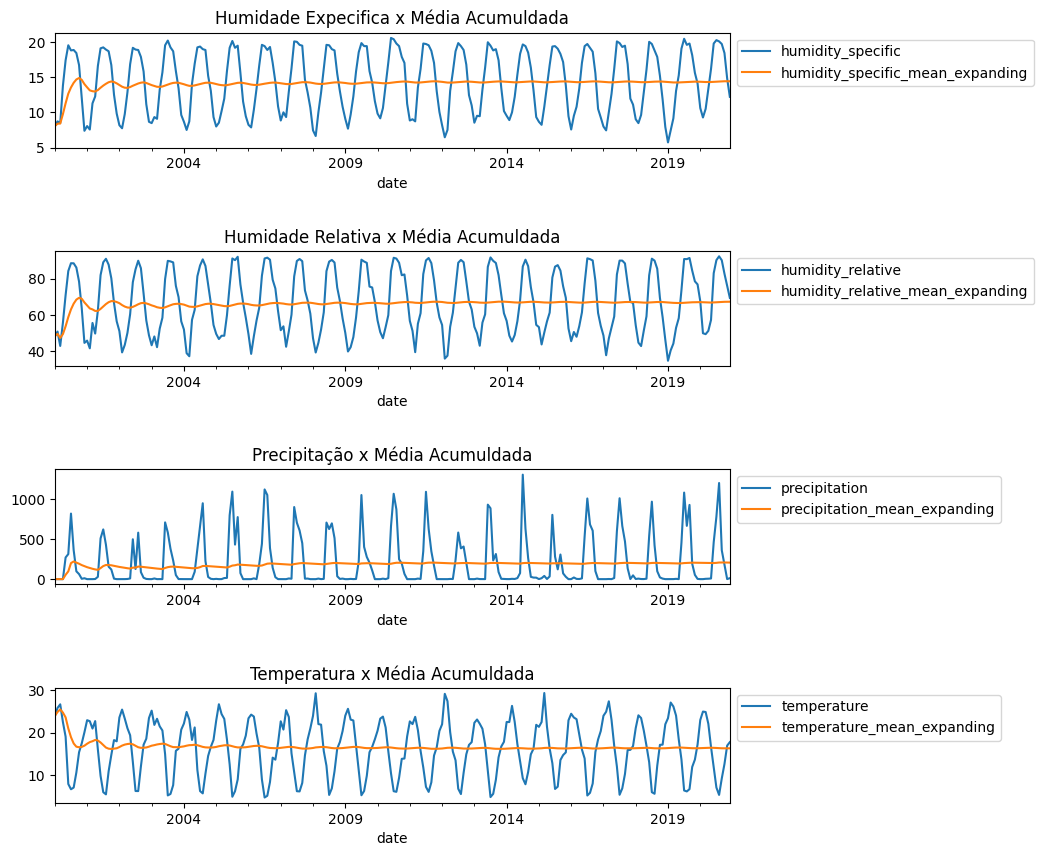

In [7]:
# Plotando os dados
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(10, 10))

data.plot(
    title="Humidade Expecifica x Média Acumuldada", 
    x='date', 
    y=['humidity_specific', 'humidity_specific_mean_expanding'], 
    ax=axs[0])
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move a legenda para fora

data.plot(title="Humidade Relativa x Média Acumuldada",
    x='date', 
    y=['humidity_relative', 'humidity_relative_mean_expanding'], 
    ax=axs[1])
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move a legenda para fora

data.plot(title="Precipitação x Média Acumuldada", 
    x='date', 
    y=['precipitation', 'precipitation_mean_expanding'], 
    ax=axs[2])
axs[2].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move a legenda para fora

data.plot(title="Temperatura x Média Acumuldada",
    x='date', 
    y=['temperature', 'temperature_mean_expanding'], 
    ax=axs[3])
axs[3].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move a legenda para fora

plt.subplots_adjust(hspace=0.9,right=0.8)
plt.show()

## Correlações

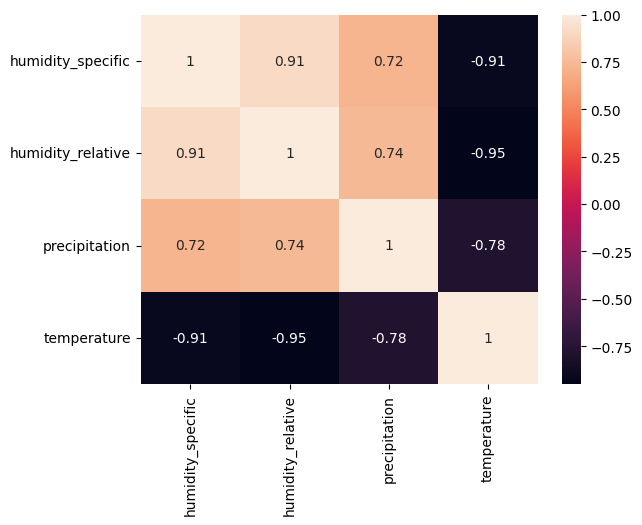

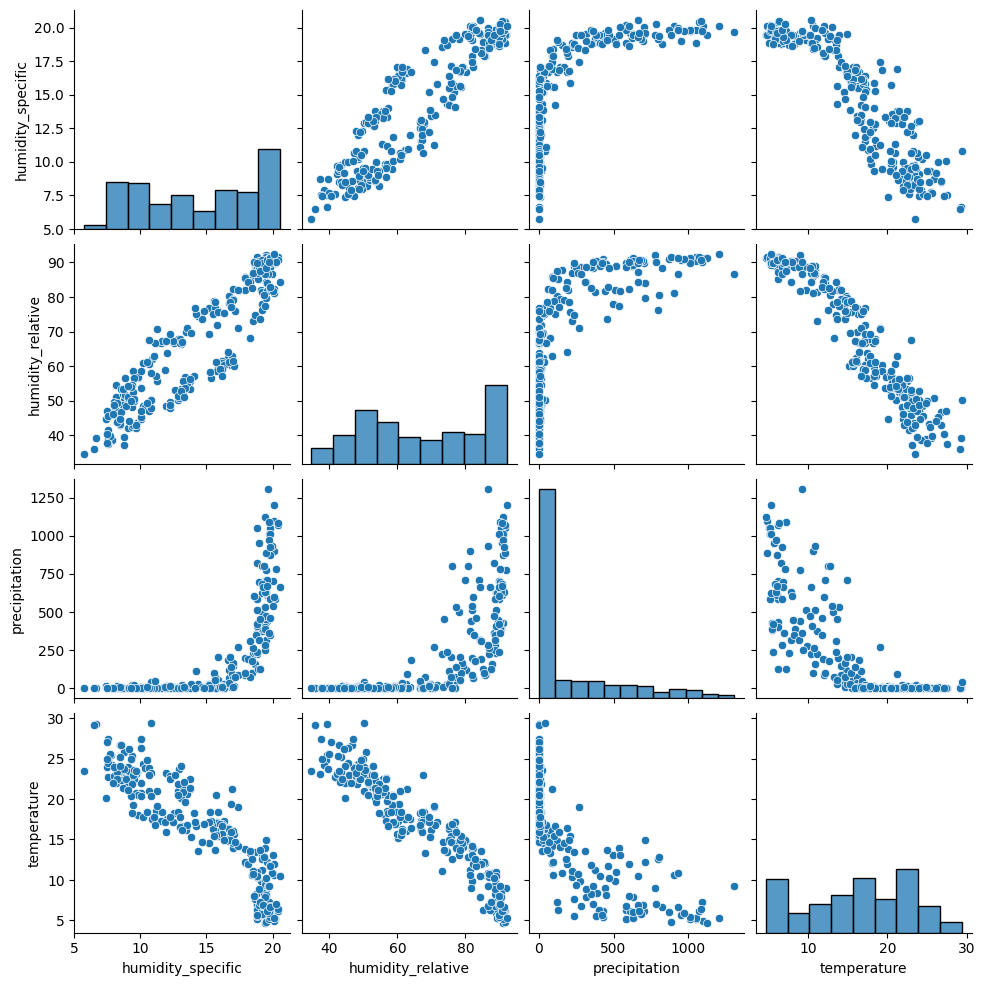

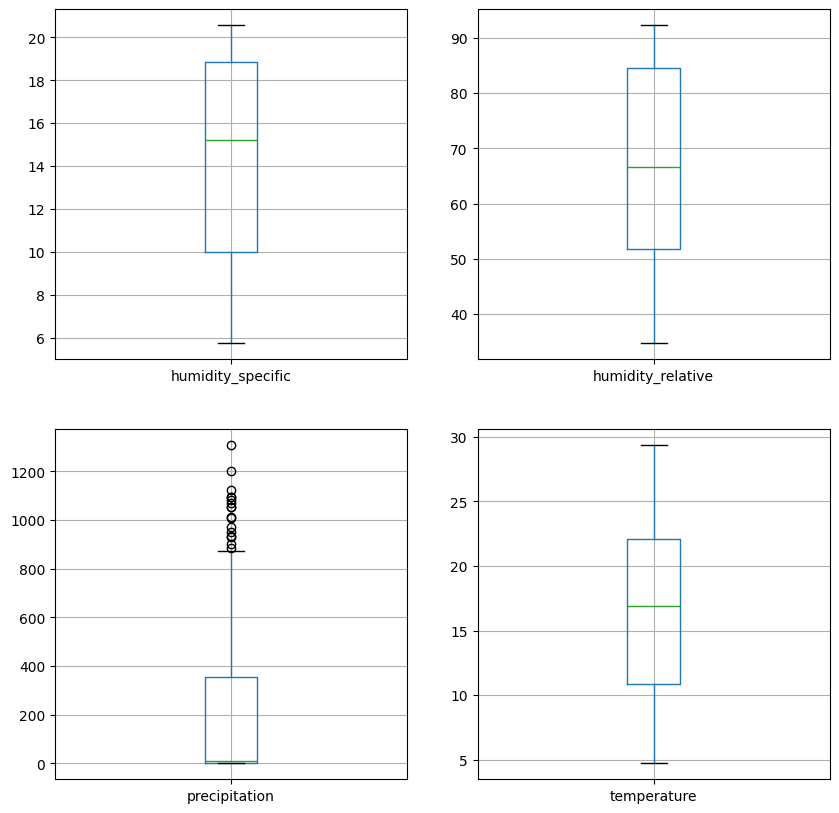

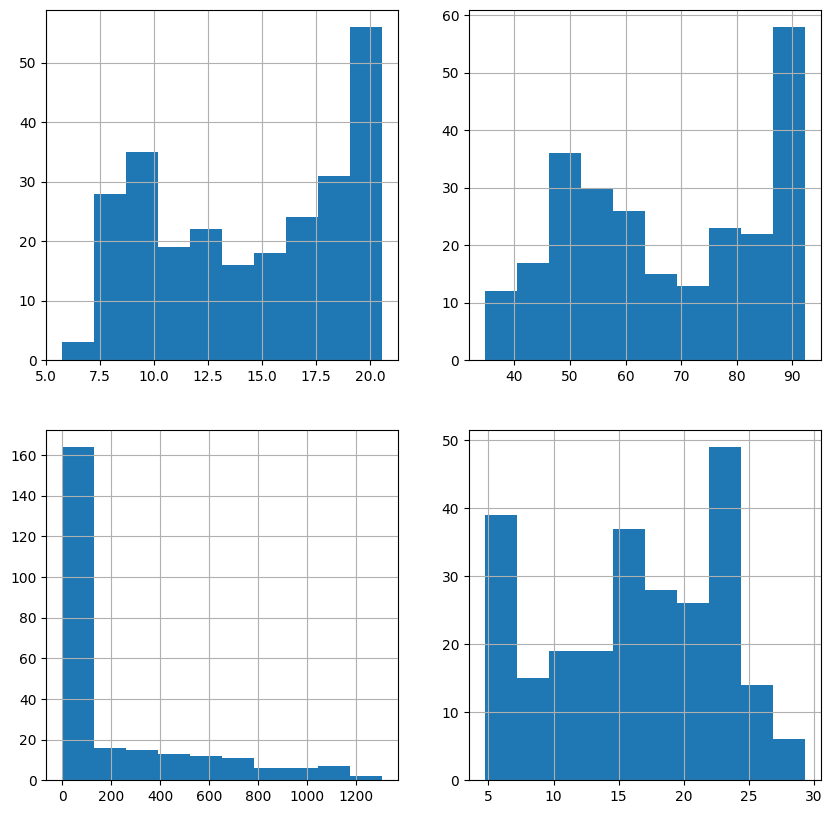

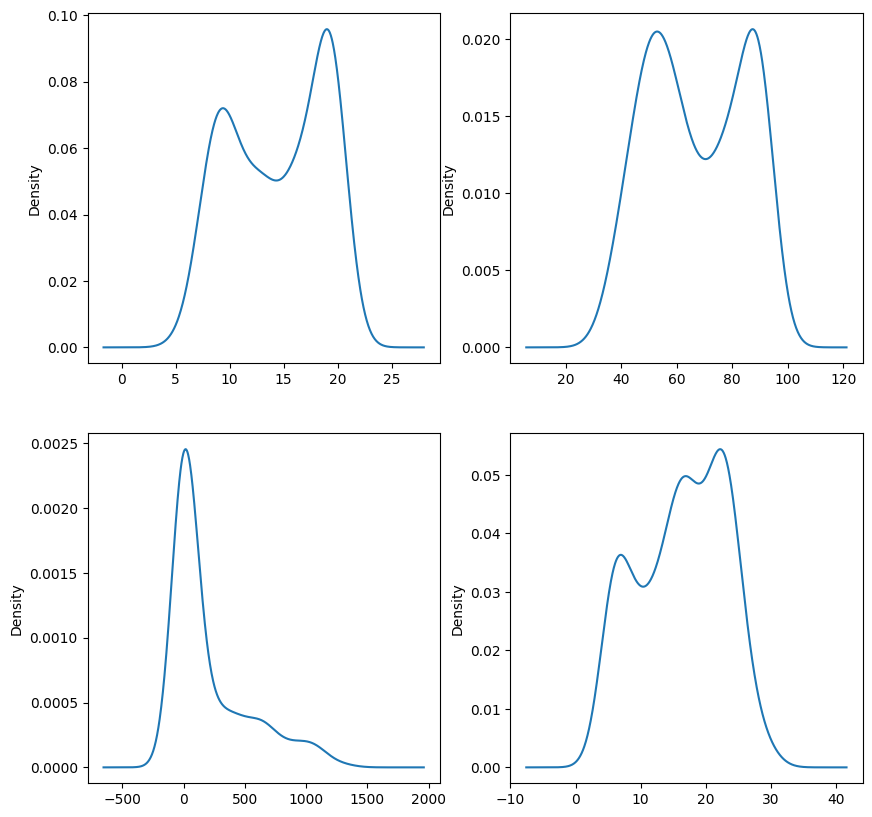

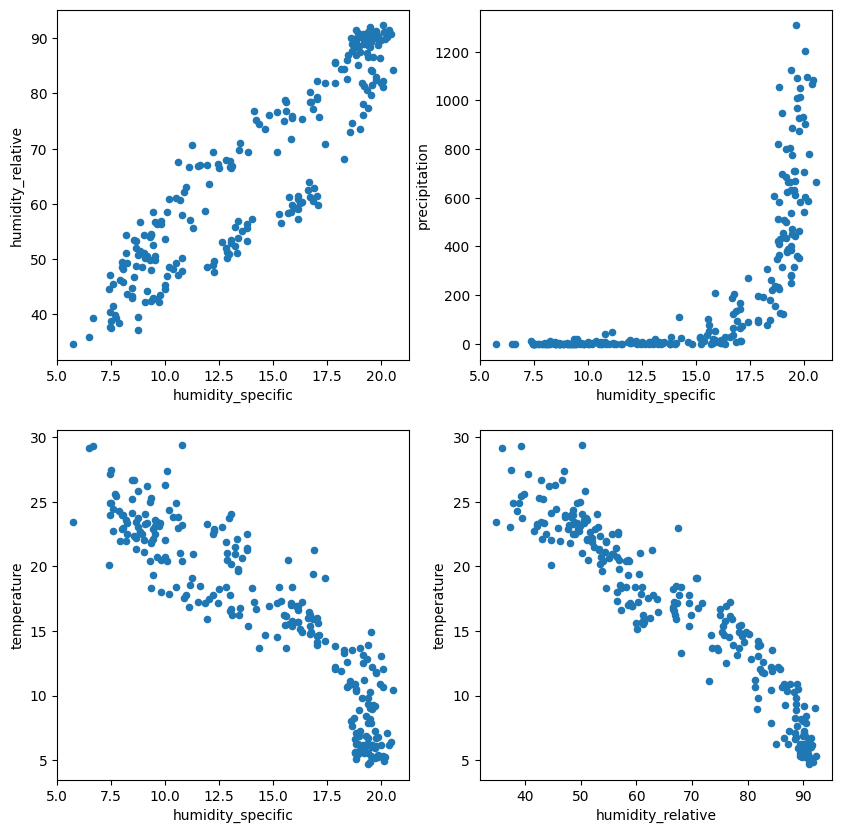

In [8]:
# Plotar correlações
import seaborn as sns

data_corr = data[["humidity_specific", "humidity_relative", "precipitation", "temperature"]]
corr = data_corr.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Plotar Pairplot
sns.pairplot(data_corr)

plt.show()

# Plotar Boxplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

data_corr.boxplot(column='humidity_specific', ax=axs[0, 0])
data_corr.boxplot(column='humidity_relative', ax=axs[0, 1])
data_corr.boxplot(column='precipitation', ax=axs[1, 0])
data_corr.boxplot(column='temperature', ax=axs[1, 1])

plt.show()

# Plotar Histograma
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

data_corr['humidity_specific'].hist(ax=axs[0, 0])
data_corr['humidity_relative'].hist(ax=axs[0, 1])
data_corr['precipitation'].hist(ax=axs[1, 0])
data_corr['temperature'].hist(ax=axs[1, 1])

plt.show()

# Plotar KDE
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

data_corr['humidity_specific'].plot.kde(ax=axs[0, 0])
data_corr['humidity_relative'].plot.kde(ax=axs[0, 1])
data_corr['precipitation'].plot.kde(ax=axs[1, 0])
data_corr['temperature'].plot.kde(ax=axs[1, 1])

plt.show()

# Plotar Scatter
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

data_corr.plot.scatter(x='humidity_specific', y='humidity_relative', ax=axs[0, 0])
data_corr.plot.scatter(x='humidity_specific', y='precipitation', ax=axs[0, 1])
data_corr.plot.scatter(x='humidity_specific', y='temperature', ax=axs[1, 0])
data_corr.plot.scatter(x='humidity_relative', y='temperature', ax=axs[1, 1])

plt.show()


## Preparando para Modelos
Vamos usar somente PRECIPITAÇÃO

In [9]:
# contar quandos anos temos no dataset data
qtd_anos = data['date'].dt.year.unique()
print(f"Quantidade de anos no dataset: {len(qtd_anos)}")

# Marcar o ano que representa 2 terços da qtd_anos
ano_2_tercos = qtd_anos[int(len(qtd_anos) * 2 / 3)]
print(f"Ano que representa 2/3 da quantidade de anos: {ano_2_tercos}")

# separar o dataset em 2 partes: antes e depois do ano_2_tercos
train_subset = data[data['date'].dt.year < ano_2_tercos]
test_subset = data[data['date'].dt.year >= ano_2_tercos]

data_train = train_subset[["date","precipitation"]].copy()
data_train.set_index('date', inplace=True)

data_test = test_subset[["date","precipitation"]].copy()
data_test.set_index('date', inplace=True)


Quantidade de anos no dataset: 21
Ano que representa 2/3 da quantidade de anos: 2014


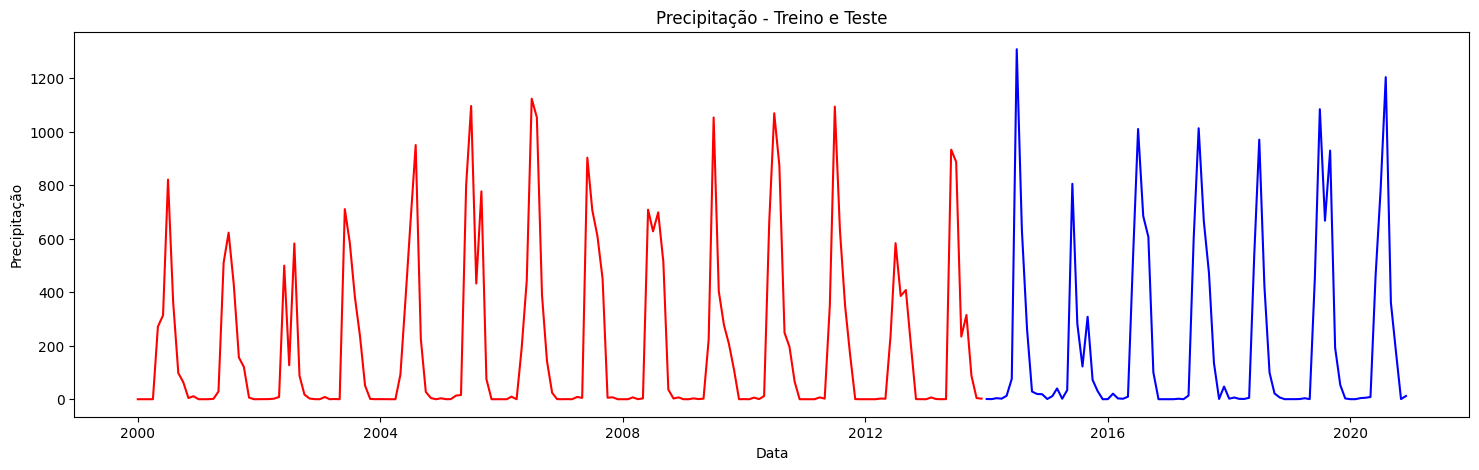

In [10]:
# Plotar os dados de treino e teste (precipitação) em um mesmo grafico para verificar se a separação foi feita corretamente

plt.figure(figsize=(18, 5))
plt.title("Precipitação - Treino e Teste")
plt.plot(data_train, label="Treino", color='red')
plt.plot(data_test, label="Teste", color='blue')
plt.xlabel("Data")
plt.ylabel("Precipitação")
plt.show()

### Decompondo TimeSeries
- tendência, 
- sazonalidade e 
- resíduo

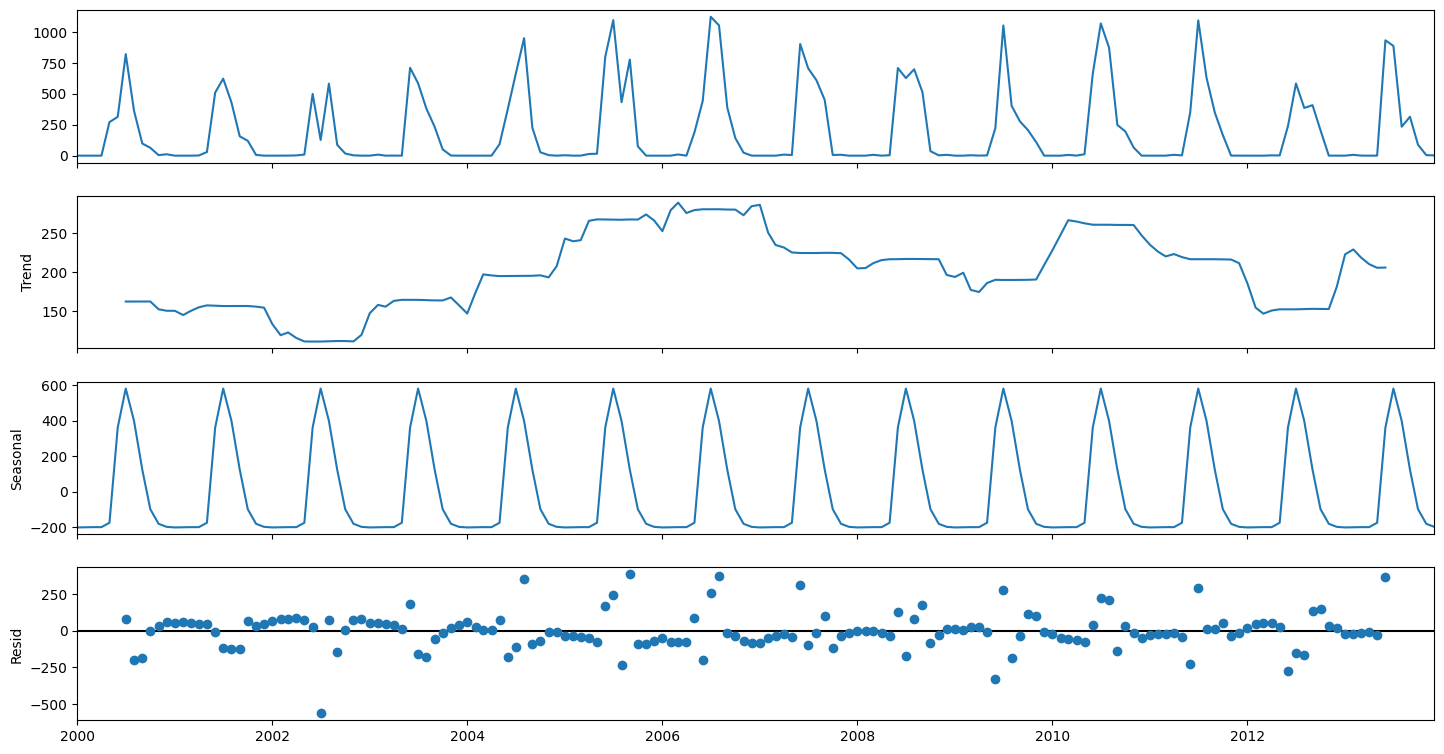

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

season = seasonal_decompose(data_train, period=12)
fig = season.plot()
fig.set_size_inches(16,8)

### Verificando se a série é estacionária

#### Teste de Dickey Fuller
 Com base no valor P base de 5%, ou seja, caso o valor P esteja abaixo desses 5% significa que a série é estatisticamente estacionária.

In [12]:
#Teste de Dickey Fuller
from statsmodels.tsa.stattools import adfuller

adfinput = adfuller(data_train["precipitation"])
adftest = pd.Series(
    adfinput[0:4], 
    index=[
        'Teste Estatistico Dickey Fuller',
        'Valor-P',
        'Lags Usados',
        'Número de observações usadas'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Valores Críticos (%s)"%key] = value.round(4) 
adftest

Teste Estatistico Dickey Fuller     -1.6840
Valor-P                              0.4394
Lags Usados                         12.0000
Número de observações usadas       155.0000
Valores Críticos (1%)               -3.4733
Valores Críticos (5%)               -2.8804
Valores Críticos (10%)              -2.5768
dtype: float64

> Neste caso o teste de Dickey Fuller indicou que a série não é estacionária (Valor P de 43% e o valor crítico de 5% [-2.8804] é menor que o teste estatístico)

#### Teste de KPSS
O teste KPSS já pressupõe que a série é estacionária e só não será se o valor P for inferior a 5% ou o teste estatístico for menor que algum valor crítico escolhido

In [13]:
from statsmodels.tsa.stattools import kpss

kpss_input = kpss(data_train["precipitation"])
kpss_test = pd.Series(
    kpss_input[0:3], 
    index=[
        'Teste Statistico KPSS',
        'Valor-P',
        'Lags Usados'])
kpss_test = round(kpss_test,4)
    
for key, value in kpss_input[3].items():
    kpss_test["Valores Críticos (%s)"%key] = value 
kpss_test

/tmp/ipykernel_29228/2669903544.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_input = kpss(data_train["precipitation"])


Teste Statistico KPSS      0.0691
Valor-P                    0.1000
Lags Usados                3.0000
Valores Críticos (10%)     0.3470
Valores Críticos (5%)      0.4630
Valores Críticos (2.5%)    0.5740
Valores Críticos (1%)      0.7390
dtype: float64

> Confirmando o teste de Dickey Fuller, o teste KPSS também mostra que a série não é estacionária, pois o valor P está em 10% e o teste estatístico está acima de qualquer valor crítico.

### Transformando a série em estacionária


#### Diferenciação

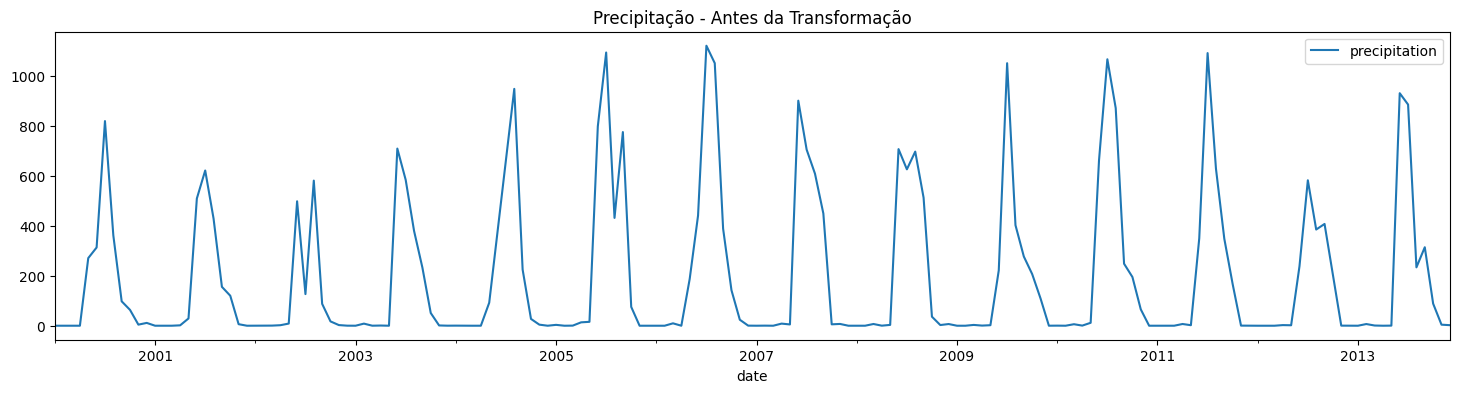

In [14]:
# Antes da transformação
data_train.plot(figsize=(18,4), title='Precipitação - Antes da Transformação')
plt.show()

<Axes: title={'center': 'Precipitação - Depois da Transformação'}, xlabel='date'>

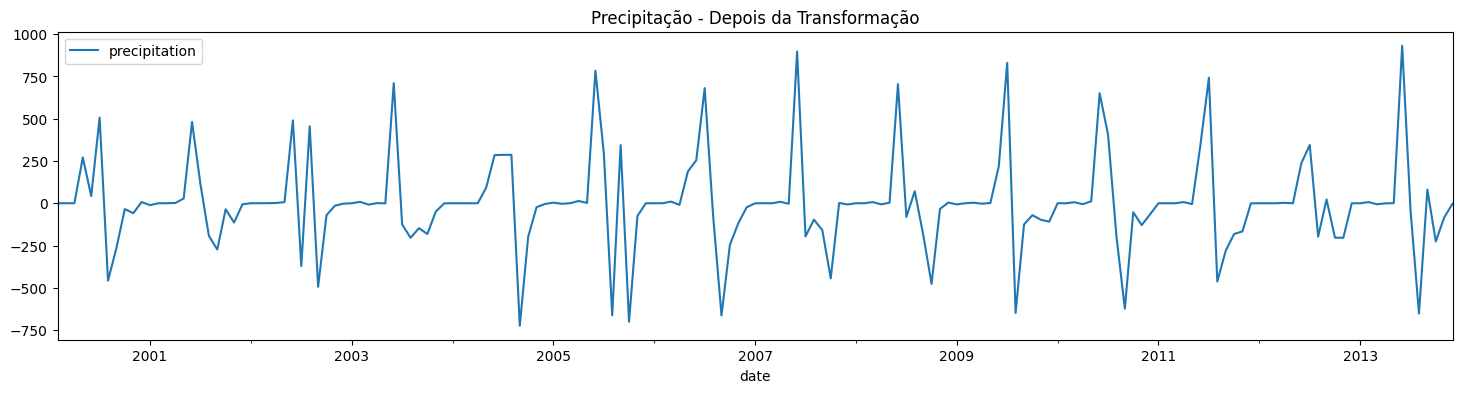

In [15]:
# Depois da transformação
data_train_diff = data_train.diff().dropna()
data_train_diff.plot(figsize=(18,4), title='Precipitação - Depois da Transformação')

In [16]:
# Teste de Dickey Fuller
def adfuller_test(serie, figsize=(18,4), plot=True, title=""):
    if plot:
        serie.plot(figsize=figsize, title=title)
        plt.show()
    #Teste de Dickey Fuller sobre a primeira diferenciação
    adf = adfuller(serie)
    output = pd.Series(
        adf[0:4], 
        index=[
            'Teste Estatistico Dickey Fuller',
            'Valor-P',
            'Lags Usados',
            'Número de observações usadas'])
    output = round(output,4)
    
    for key, value in adf[4].items():
        output["Valores Críticos (%s)"%key] = value.round(4) 
    return output

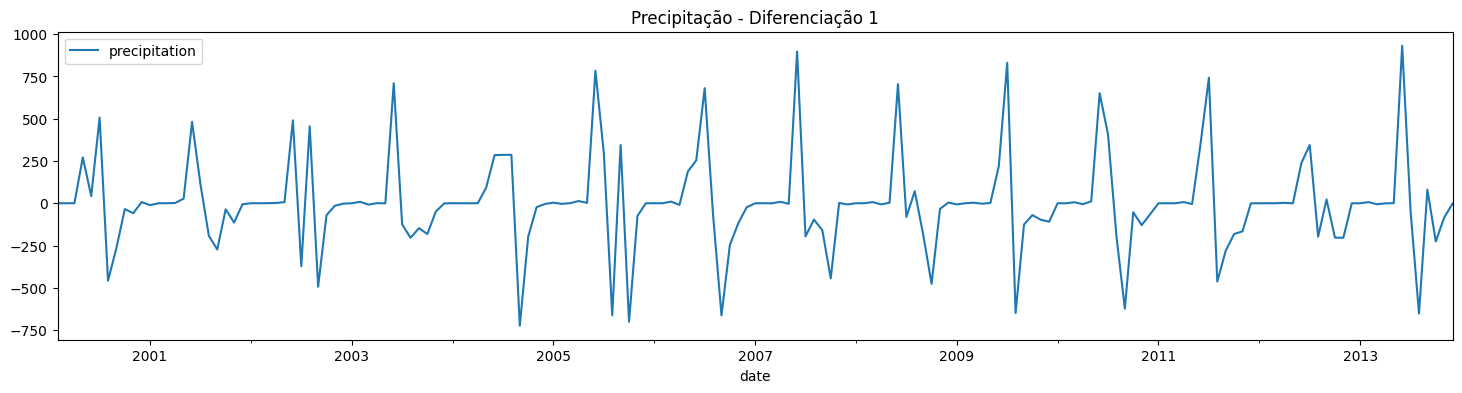

Teste Estatistico Dickey Fuller    -13.2768
Valor-P                              0.0000
Lags Usados                         11.0000
Número de observações usadas       155.0000
Valores Críticos (1%)               -3.4733
Valores Críticos (5%)               -2.8804
Valores Críticos (10%)              -2.5768
dtype: float64

In [17]:
adfuller_test(data_train_diff, title="Precipitação - Diferenciação 1")

> Neste caso confirmamos que a série está estácionária, o valor P está zerado e se formos comparar, o valor do teste estatístico está muito abaixo dos valores críticos.

### À procura de lags correlacionados

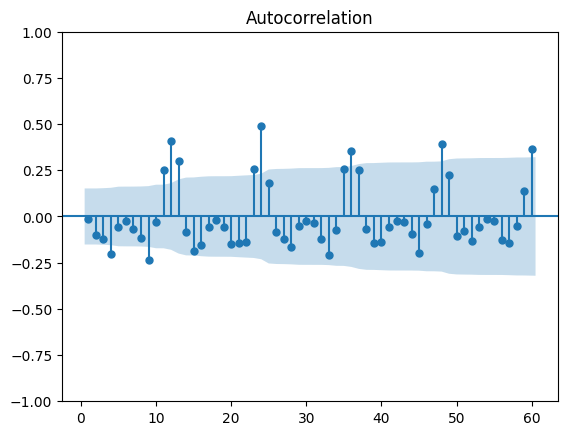

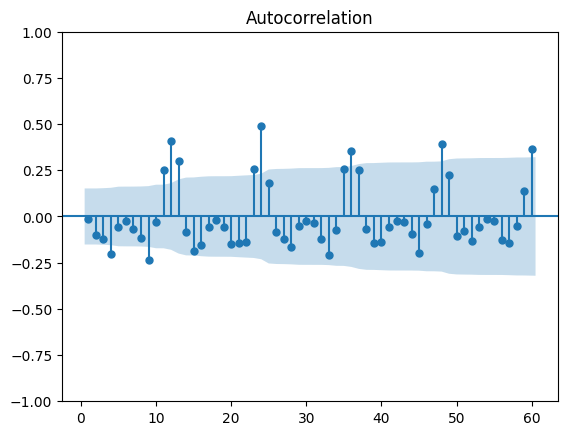

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_train_diff["precipitation"], lags=60, zero=False)

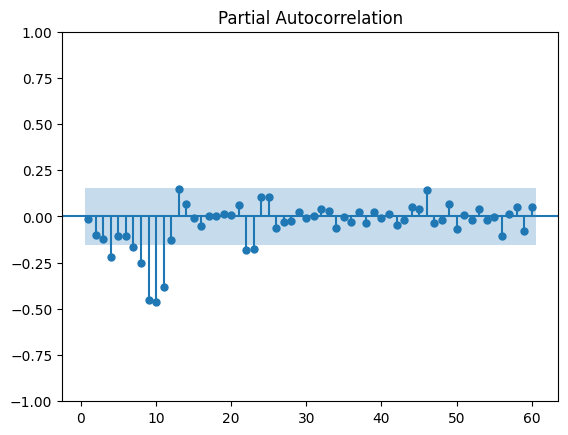

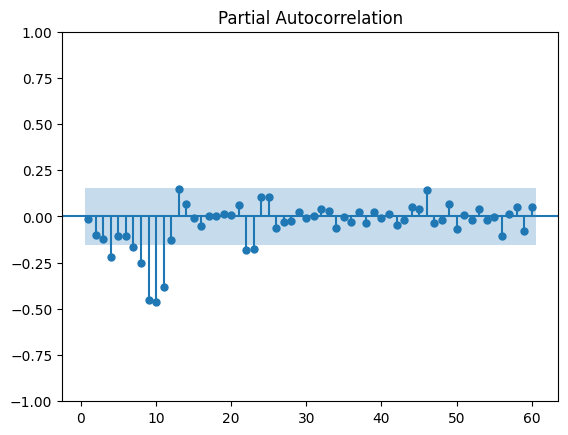

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(data_train_diff["precipitation"], lags=60, zero=False)